# 6. 학습 관련 기술들

## 6.1 매개변수 갱신

* 신경망의 목적 (최적화): 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것 -> 매개변수의 최적값을 찾는 문제

* 확률적 경사 하강법(SGD): 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)을 이용하였고, 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가간다.

### 6.1.1 모험가 이야기
* SGD의 전략: 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가는 것

### 6.1.2 확률적 경사 하강법(SGD)

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

* lr (learning rate) -> 학습률
* update(params, grads) -> SGD 과정을 반복해서 불립니다. 
* params & grads -> 딕셔너리 변수

* network = TwoLayerNet(...)
* optimizer = SGD() 
* for i in range(10000):
*    ...
*    x_batch, t_batch = get_mini_batch(...) # 미니배치
*    grads = network.gradient(x_batch, t_batch)
*    params = network.params
*    optimizer.update(params, grads) 
*    ...

* optimizer: 최적화를 행하는 자

### 6.1.3 SGD의 단점
* SGD는 단순하고 구현도 쉽지만, 비효율적일 수도 있다.
* SGD의 단점: 비등방성 함수 (방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다. 
* SGD의 단점 개선: 모멘텀, AdaGrad, Adam 방법

### 6.1.4 모멘텀
* 모멘텀: '운동량'을 뜻하고, 물리와 관계가 있다. 

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

* 인스턴스 변수 v: 물체의 속도
* x축의 힘은 아주 작지만, 방향은 변하지 않고 한 방향으로 일정하게 가속한다.

### 6.1.5 AdaGrad
* 학습률이 너무 작으면 학습 시간이 길어지고, 반대로 학습률이 너무 크면 발산하여 학습이 제대로 이루어지지 않는다. 
* 학습률을 정하는 효과적 기술 -> 학습률 감소
* 학습률을 서서히 낮추는 가장 간단한 방법: 매개변수 '전체'의 학습률 값을 일괄적으로 낮춘다. 

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam
* 모멘텀: 공이 그릇 바닥을 구르는 듯한 움직임을 보였습니다. 
* AdaGrad: 매개변수의 원소마다 적응적으로 갱신 정도를 조정했습니다. 
* 모멘텀 & AdaGrad의 융합 -> Adam

### 6.1.7 어느 갱신 방법을 이용할 것인가?
* 매개변수의 갱신 방법 (4개): SGD, 모멘텀, AdaGrad, Adam
* 뛰어난 기법은 아직 없다. 

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교
* 실험: 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로는 사용해 측정

## 6.2 가중치의 초깃값
* 신경망 학습에서 중요한 것: 가중치의 초깃값

### 6.2.1 초깃값을 0으로 하면?
* 가중치 감소 기법: 오버피팅을 억제해 범용 성능을 높이는 기술 & 가중치 매개변수의 값이 작아지도록 하는 방법 & 가중치 값을 작게 하여 오버피팅이 일어나지 않게 한다. 
* 초깃값을 0으로 한다면, 나쁜 결과를 불러온다. -> 학습이 올바로 이뤄지지 않는다. 
* 이유: 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. 
* 2층 신경망에서의 첫 번째와 두 번째 층의 가중치가 0이라고 가정하고, 순전파 때, 입력층의 가중치가 0이기 때문에 2번째 층의 뉴런에 모두 같은 값이 전달됩니다. 
* 2번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 2 번째 층의 가중치가 모두 똑같이 갱신된다는 것이다. 

### 6.2.2 은닉층의 활성화값 분포

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    

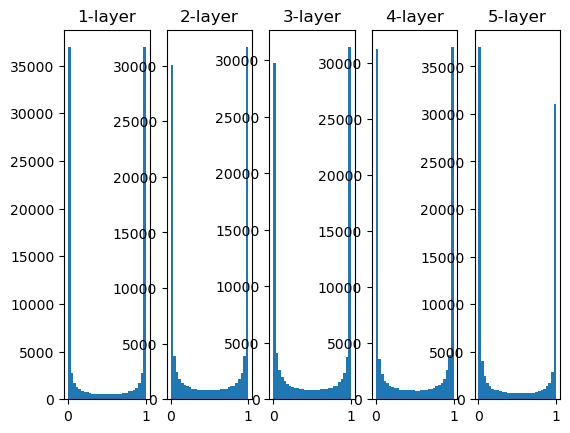

In [7]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있고, 사용한 시그모이드 함수는 출력이 0 또는 1에 가까워지자 미분은 0에 다가갑니다. 

In [8]:
# w = np.random.randn(node_num, node_num) * 1
w = np.random.randn(node_num, node_num) * 0.01

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

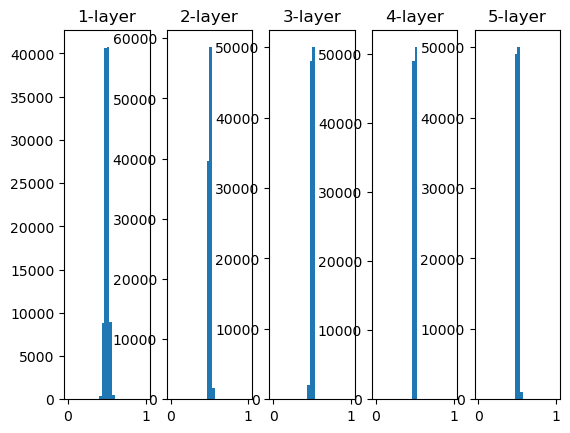

In [13]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 이번에는 0.5 부근에 집중되어 있다. 
* 활성화값들이 치우치면 표현력을 제한한다. 
* 각 층의 활성화값은 적당히 분포되어야하며, 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄진다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100           # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5    # 은닉층이 5개
activations = {}         # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

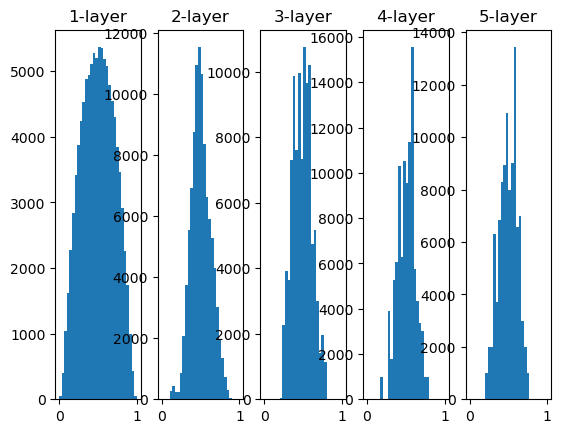

In [15]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* Xavier 초깃값을 사용했을 때

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

* Xavier 초깃값: 활성화 함수가 선형인 것을 전제로 이끈 결과
* ReLU를 이용할 떄는 ReLU에 특화된 초깃값을 이용해야한다. 
* 특화된 초깃값을 찾아낸 카이밍 히의 이름을 따면 He 초깃값